<h1>Exploratory Data Analysis (cont)</h1>

Using the German Credit dataset, i will explore the categorical variables, make a bivariate analysis and finally make some other useful graphics.

Dataset Kaggle link: https://www.kaggle.com/uciml/german-credit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipynb.fs.full.funPyModeling import freq_tbl, status, profiling_num, cat_vars, num_vars

<h3>Data Loading</h3>

In [2]:
data=pd.read_csv("data/german_credit_data.csv", sep = ",")

<h3>Dataset status</h3>

In [3]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.000,0,0.000,53,int64
1,Sex,0,0.000,0,0.000,2,object
2,Job,0,0.000,22,0.022,4,int64
3,Housing,0,0.000,0,0.000,3,object
4,Saving_accounts,183,0.183,0,0.000,4,object
5,Checking_account,394,0.394,0,0.000,3,object
6,Credit_amount,0,0.000,0,0.000,921,int64
7,Duration,0,0.000,0,0.000,33,int64
8,Purpose,0,0.000,0,0.000,8,object
9,Risk,0,0.000,0,0.000,2,object


In this dataset, i see 183 NaNs in 'Saving_accounts' and 394 NaNs in 'Checking_account'. I dont see any high cardinality variable. Also, there are 6 categorical variables and 4 numerical variables.

<h3>Numerical variables analysis</h3>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Job'}>],
       [<AxesSubplot:title={'center':'Credit_amount'}>,
        <AxesSubplot:title={'center':'Duration'}>]], dtype=object)

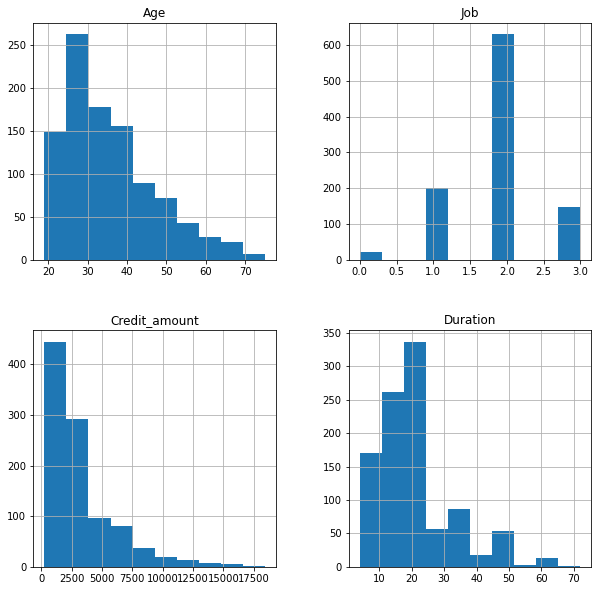

In [4]:
data.hist(figsize = (10,10))

There are outliers in 'Credit_amount' and 'Duration'

The 'Job' variable is numerical, but i want it to be categorical, so i will cast it

In [5]:
data['Job']=data['Job'].astype('str')

<h3>Categorical variables analysis</h3>

In [6]:
freq_tbl(data['Job'])

,Job,frequency,percentage,cumulative_perc
0,2,630,0.630,0.630
1,1,200,0.200,0.830
2,3,148,0.148,0.978
3,0,22,0.022,1.000


There are 4 categories for 'Job'. The category with more frequency is 2 (skilled job), followed by 1 (unskilled and resident).


Analyzing the frequencies of all the categorical variables

In [7]:
freq_tbl(data)

      Sex  frequency  percentage  cumulative_perc
0    male        690        0.69             0.69
1  female        310        0.31             1.00

----------------------------------------------------------------

  Job  frequency  percentage  cumulative_perc
0   2        630       0.630            0.630
1   1        200       0.200            0.830
2   3        148       0.148            0.978
3   0         22       0.022            1.000

----------------------------------------------------------------

  Housing  frequency  percentage  cumulative_perc
0     own        713       0.713            0.713
1    rent        179       0.179            0.892
2    free        108       0.108            1.000

----------------------------------------------------------------

  Saving_accounts  frequency  percentage  cumulative_perc
0          little        603       0.603         0.738066
1        moderate        103       0.103         0.864137
2      quite rich         63       0.063     

Index(['Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Purpose', 'Risk'],
      dtype='object')

Bar graphic representation of the categorical variables

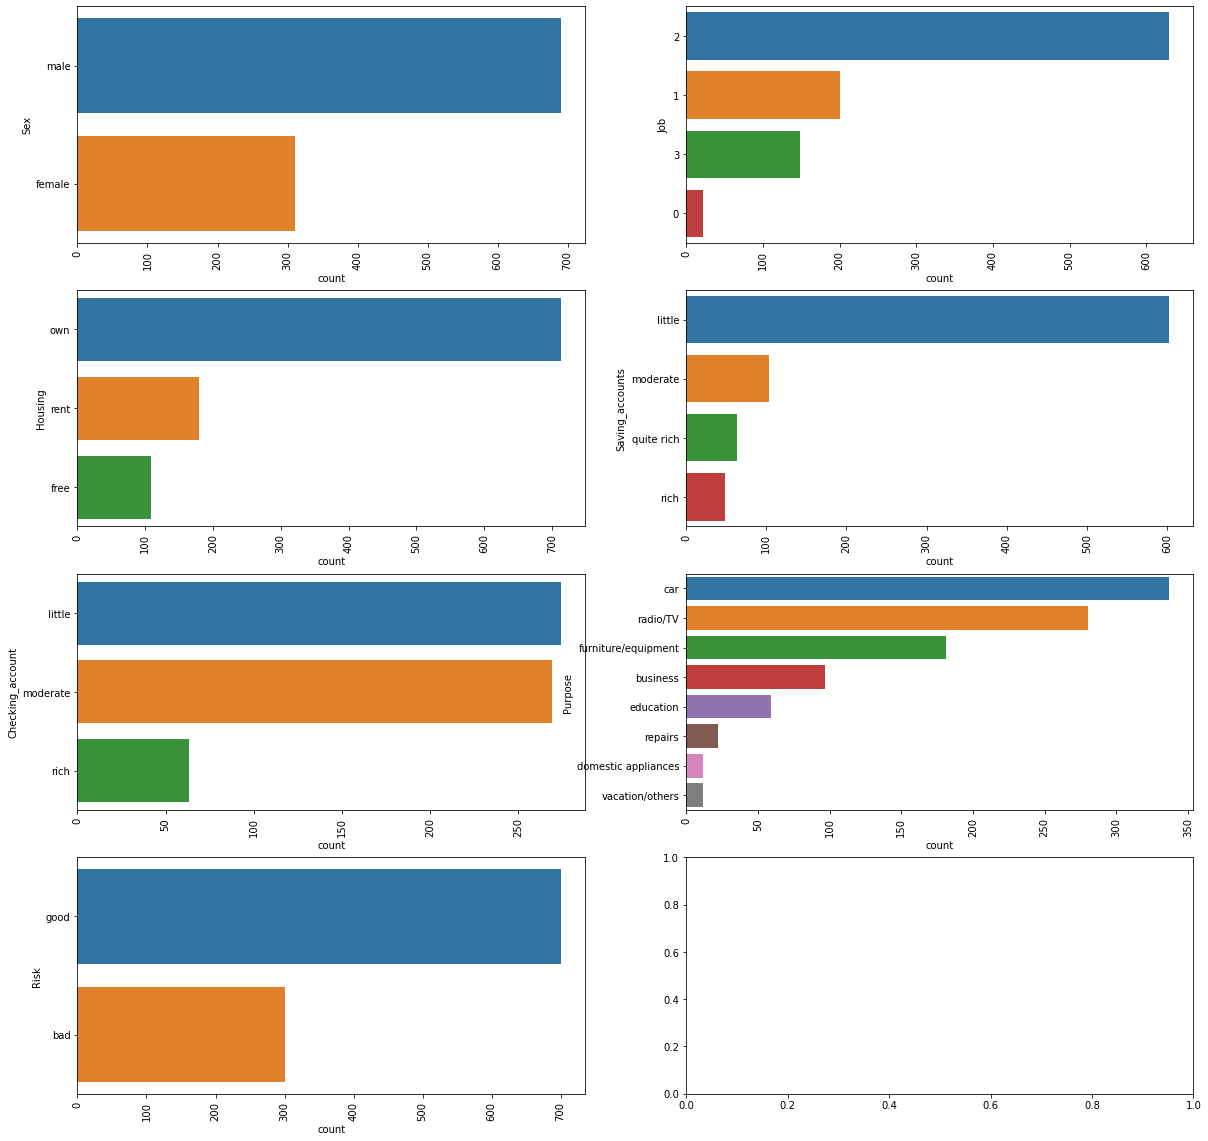

In [8]:
d_plot=data
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for variable, subplot in zip(cat_vars(d_plot), ax.flatten()):
    sns.countplot(y=d_plot[variable], ax=subplot, order = d_plot[variable].value_counts().index)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

<h3>Bivariate analysis</h3>

<h5>What is the relation between 'saving_accounts' and 'risk'?</h5>

In [9]:
pd.crosstab(data['Saving_accounts'], data['Risk'])

Risk,bad,good
Saving_accounts,,
little,217,386
moderate,34,69
quite rich,11,52
rich,6,42


In this dataset, there are more persons with good credit risk than bad credit risk

Analyzing the cross tabulation, i see that there are more persons with little saving accounts. Also, there are more bad risk in the persons with lower saving accounts.

<h5>Is the age changing with the credit purpose?</h5>

In [10]:
data.groupby('Purpose')['Age'].mean().sort_values(ascending=False)

Purpose
vacation/others        39.916667
repairs                38.545455
education              38.288136
car                    37.139466
business               35.484536
radio/TV               34.700000
domestic appliances    34.250000
furniture/equipment    32.458564
Name: Age, dtype: float64

In [11]:
data.groupby('Purpose')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Purpose,,,,,,,,
business,97.0,35.484536,11.401858,21.0,27.0,33.0,39.00,74.0
car,337.0,37.139466,11.649960,20.0,28.0,35.0,43.00,75.0
domestic appliances,12.0,34.250000,13.376540,22.0,24.0,28.0,39.50,62.0
education,59.0,38.288136,11.555042,21.0,30.5,36.0,46.50,67.0
furniture/equipment,181.0,32.458564,9.747632,19.0,25.0,30.0,39.00,63.0
radio/TV,280.0,34.700000,11.142736,20.0,26.0,32.0,40.25,67.0
repairs,22.0,38.545455,14.879603,22.0,25.5,33.5,48.00,67.0
vacation/others,12.0,39.916667,11.325421,27.0,30.5,39.5,45.00,60.0


The result of this analysis is that, with a lower mean age, the credit is used to buy house equipment. In the other side, with greater mean age, the credit is used in vacations, repairs and education.

This could means that with greater age, the persons tends to have their house full equiped and sons, so they will spends credits in vacations, repairs and educations.

<h5>Mean of all variables, grouping by Risk</h5>

In [12]:
data.groupby('Risk').mean()

,Age,Credit_amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In this analysis, i see that with lower mean age, the credit amount and their duration increases.

<h3>Other graphics</h3>

Age vs Purpose box graphic

<AxesSubplot:xlabel='Purpose', ylabel='Age'>

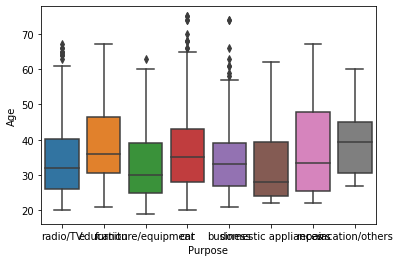

In [13]:
sns.boxplot(y = 'Age', x = 'Purpose', data = data)

Housing vs Risk graphic

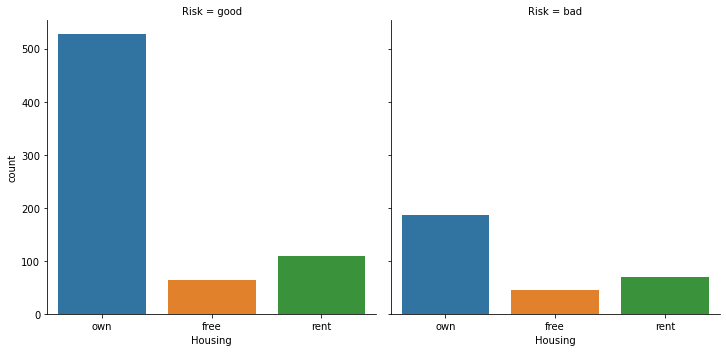

In [14]:
g = sns.catplot(x="Housing",
                col="Risk",
                data= data,
                kind="count")

Dataset scatter plot

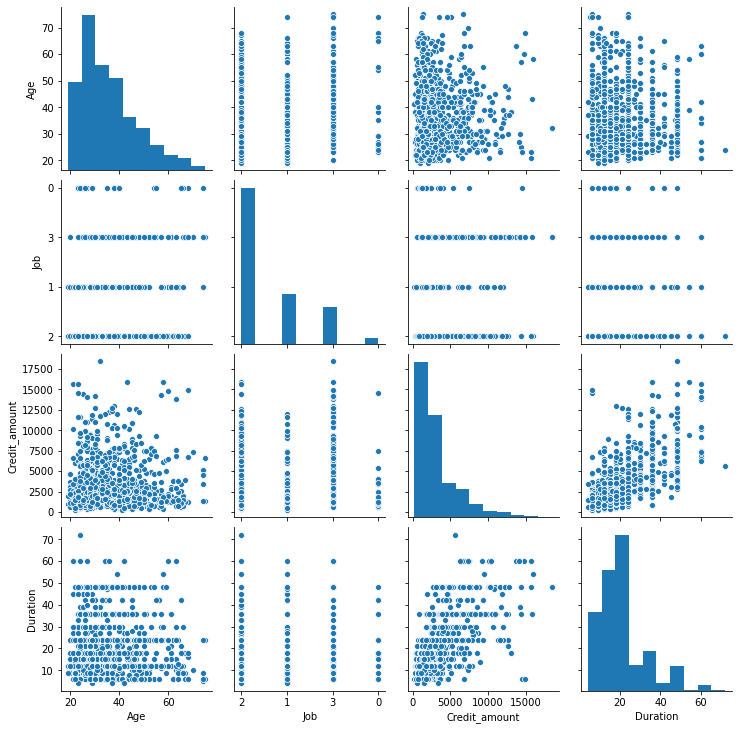

In [15]:
sns.pairplot(data)

This graphics lead to the same conclusions reached through a numerical analysis